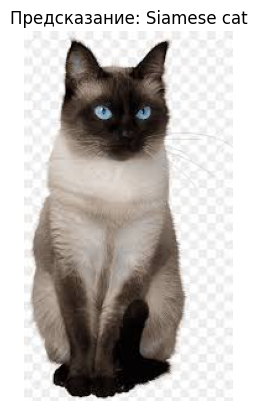

In [9]:
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet18, ResNet18_Weights
from PIL import Image
import matplotlib.pyplot as plt

model = resnet18(weights=ResNet18_Weights.DEFAULT)
model.eval()  

def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Изменение размера изображения
        transforms.ToTensor(),         # Преобразование в тензор
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Нормализация
    ])
    img_tensor = transform(img).unsqueeze(0)  # Добавляем размер батча
    return img, img_tensor


def predict(image_tensor):
    with torch.no_grad():
        outputs = model(image_tensor)  # Прямой проход модели
        _, predicted_idx = torch.max(outputs, 1)  # Индекс с максимальным значением
        return predicted_idx.item()


def load_class_names():
    url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
    import requests
    response = requests.get(url)
    return response.text.strip().split("\n")

image_path = "C:\\Users\\igleb\\OneDrive\\Рабочий стол\\PythonProj\\AIpractice\\JuNote\\Cat.png"  # Укажите путь к изображению


try:
    original_image, image_tensor = preprocess_image(image_path)
    # Предсказание
    class_names = load_class_names()
    predicted_idx = predict(image_tensor)
    predicted_class_en = class_names[predicted_idx]

    # Вывод результата
    plt.imshow(original_image)
    plt.title(f"Предсказание: {predicted_class_en}")
    plt.axis("off")
    plt.show()
except FileNotFoundError:
    print(f"Файл {image_path} не найден. Убедитесь, что путь указан правильно.")
